## Team Details


```
Class - TY Comp A
Batch - A2

540,Harshal Nelge
538,Aniket Nalawade
530,Aasiya Momin
532,Atharva Morajkar
```


##TITLE - Customer Sentiment Analysis

## Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Text Preprocessing

download dataset from https://docs.google.com/spreadsheets/d/1nDGihYbzvLyC4zscJusJRVqrJN1L0Hw2SgsS8GNolhA/edit?usp=sharing

In [ ]:
df = pd.read_csv(r"NLP Dataset - Dataset-SA.csv", nrows=10000)

In [ ]:
df.head(10)

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral
5,the cooler is really fantastic and provides go...,positive
6,very good product,positive
7,very nice,positive
8,very bad cooler,negative
9,very good,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Summary    10000 non-null  object
 1   Sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


### Handling null values

In [ ]:
print(df.describe())

       Summary Sentiment
count    10000     10000
unique    6982         3
top       good  positive
freq       440      8331


In [ ]:
df.isnull().sum()

,0
Summary,0
Sentiment,0


In [ ]:
df=df.dropna(subset=['Summary'])

In [ ]:
df.isnull().sum()

,0
Summary,0
Sentiment,0


#EDA

Basic Dataset Info:
Total samples: 10000
Columns: ['Summary', 'Sentiment']

Missing values:
Summary      0
Sentiment    0
dtype: int64

Data types:
Summary      object
Sentiment    object
dtype: object

Sentiment Distribution:
Sentiment
positive    8331
negative    1249
neutral      420
Name: count, dtype: int64


<ipython-input-85-ee4ab99cc88a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


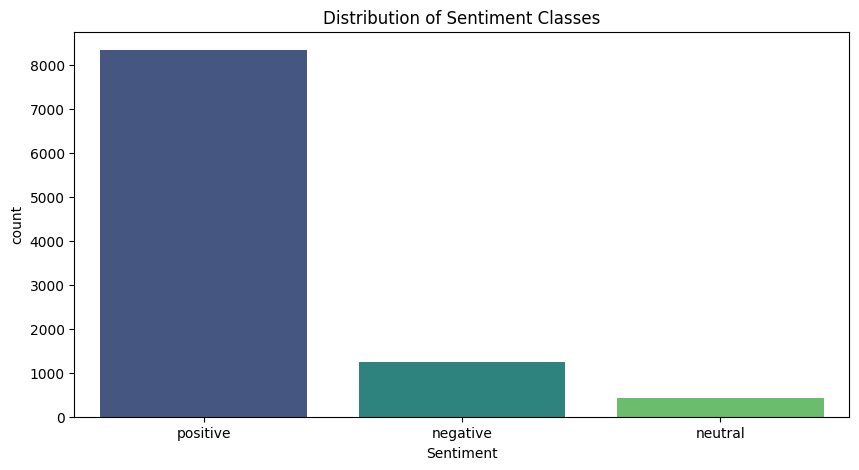


Text Length Statistics:
count    10000.000000
mean        13.951800
std         19.389308
min          1.000000
25%          2.000000
50%          6.000000
75%         17.000000
max        103.000000
Name: text_length, dtype: float64


<ipython-input-85-ee4ab99cc88a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='text_length', palette='viridis')


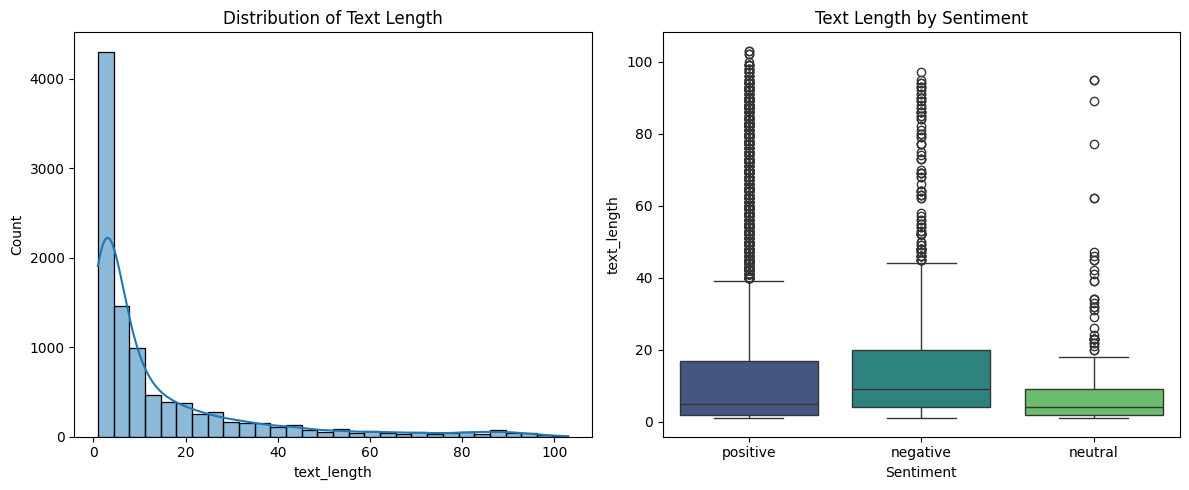


Generating Word Clouds...


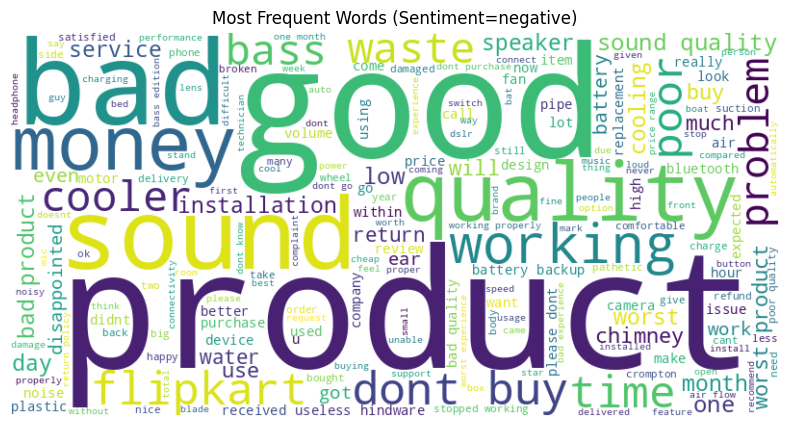

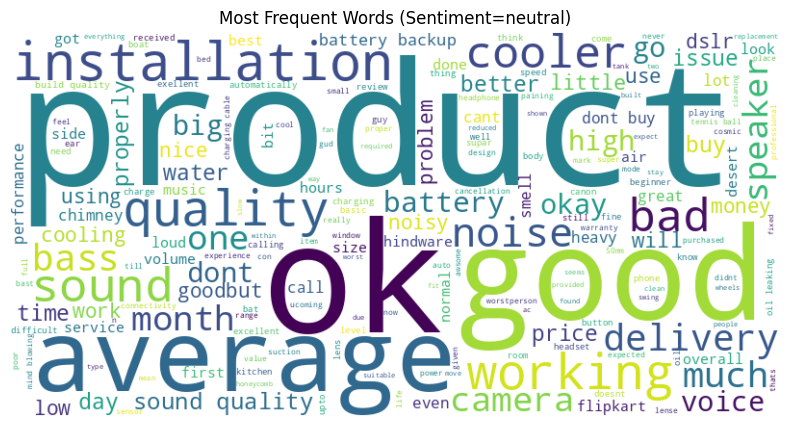

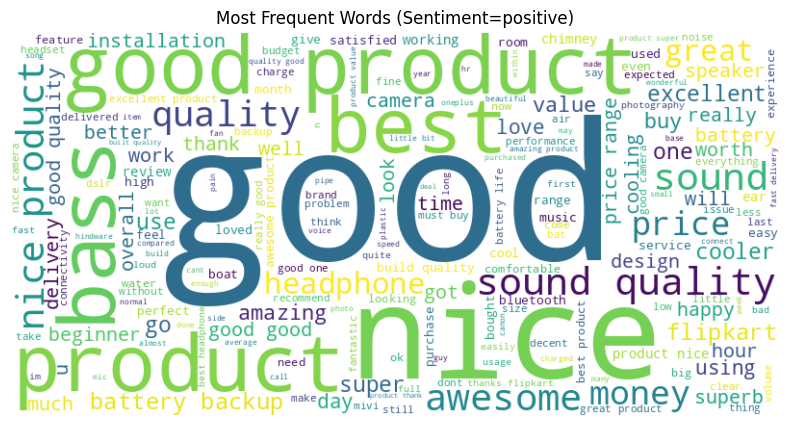


Top Bigrams by Sentiment:

Sentiment negative:
is not: 173
very bad: 128
not good: 112
is very: 102
this product: 98
dont buy: 95
not working: 83
quality is: 78
sound quality: 74
good but: 62

Sentiment neutral:
is not: 34
is very: 22
product is: 21
it is: 16
good but: 15
not working: 15
quality is: 14
is good: 14
this product: 12
not bad: 10

Sentiment positive:
very good: 910
good product: 746
sound quality: 628
is good: 566
nice product: 550
is very: 492
quality is: 488
very nice: 435
it is: 423
this price: 374


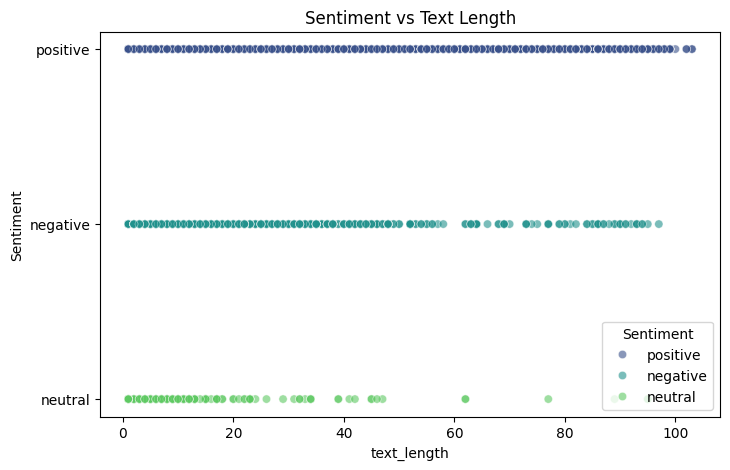

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# 1. Basic Dataset Overview
print("="*50)
print("Basic Dataset Info:")
print(f"Total samples: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

# 2. Sentiment Distribution Analysis
print("\n" + "="*50)
print("Sentiment Distribution:")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Distribution of Sentiment Classes')
plt.show()

# 3. Text Length Analysis
df['text_length'] = df['Summary'].apply(lambda x: len(str(x).split()))
print("\n" + "="*50)
print("Text Length Statistics:")
print(df['text_length'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='text_length', bins=30, kde=True)
plt.title('Distribution of Text Length')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Sentiment', y='text_length', palette='viridis')
plt.title('Text Length by Sentiment')
plt.tight_layout()
plt.show()

# 4. Word Frequency Analysis
def plot_word_cloud(sentiment):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Summary'].astype(str))
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words (Sentiment={sentiment})')
    plt.axis('off')
    plt.show()

print("\n" + "="*50)
print("Generating Word Clouds...")
for sentiment in sorted(df['Sentiment'].unique()):
    plot_word_cloud(sentiment)

# 5. N-gram Analysis (Top Bigrams)
def get_top_ngrams(text_series, n=2, top_n=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                 for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

print("\n" + "="*50)
print("Top Bigrams by Sentiment:")
for sentiment in sorted(df['Sentiment'].unique()):
    top_bigrams = get_top_ngrams(df[df['Sentiment'] == sentiment]['Summary'], n=2)
    print(f"\nSentiment {sentiment}:")
    for bigram, freq in top_bigrams:
        print(f"{bigram}: {freq}")

# 6. Sentiment vs Text Length Correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='text_length', y='Sentiment',
                hue='Sentiment', palette='viridis', alpha=0.6)
plt.title('Sentiment vs Text Length')
plt.show()

# 7. Temporal Analysis (if you have date column)
# Uncomment if you have date information
# df['date'] = pd.to_datetime(df['date'])
# df['month'] = df['date'].dt.month
# monthly_sentiment = df.groupby(['month', 'Sentiment']).size().unstack()
# monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
# plt.title('Monthly Sentiment Distribution')
# plt.show()

### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk

nltk.download('punkt_tab') # Download the 'punkt_tab' data for sentence tokenization

df['Summary']=df['Summary'].apply(lambda x: x.strip()) # Remove the unimportant commands
df['words']=df['Summary'].apply(word_tokenize) # Split the word and stored into list

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### Lowercase

In [ ]:
df['words']=[[word.lower() for word in sentence]for sentence in df['words']]

In [ ]:
df.head(10)

,Summary,Sentiment,words
0,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, and, for..."
1,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,the quality is good but the power of air is de...,positive,"[the, quality, is, good, but, the, power, of, ..."
3,very bad product its a only a fan,negative,"[very, bad, product, its, a, only, a, fan]"
4,ok ok product,neutral,"[ok, ok, product]"
5,the cooler is really fantastic and provides go...,positive,"[the, cooler, is, really, fantastic, and, prov..."
6,very good product,positive,"[very, good, product]"
7,very nice,positive,"[very, nice]"
8,very bad cooler,negative,"[very, bad, cooler]"
9,very good,positive,"[very, good]"


### Stop word removel

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words('english'))
def stopword(sentence):
    return [word for word in sentence if word not in stop_words]

df['words']=df['words'].apply(stopword)

In [ ]:
df.head(10)

,Summary,Sentiment,words
0,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, price, a..."
1,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,the quality is good but the power of air is de...,positive,"[quality, good, power, air, decent]"
3,very bad product its a only a fan,negative,"[bad, product, fan]"
4,ok ok product,neutral,"[ok, ok, product]"
5,the cooler is really fantastic and provides go...,positive,"[cooler, really, fantastic, provides, good, ai..."
6,very good product,positive,"[good, product]"
7,very nice,positive,[nice]
8,very bad cooler,negative,"[bad, cooler]"
9,very good,positive,[good]


### Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def stemming_word(row):
    return [stemmer.stem(word) for word in row]

df['words']=df['words'].apply(stemming_word)

In [ ]:
df.head(5)

,Summary,Sentiment,words
0,great cooler excellent air flow and for this p...,positive,"[great, cooler, excel, air, flow, price, amaz,..."
1,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cool]"
2,the quality is good but the power of air is de...,positive,"[qualiti, good, power, air, decent]"
3,very bad product its a only a fan,negative,"[bad, product, fan]"
4,ok ok product,neutral,"[ok, ok, product]"


### Encoding

In [ ]:
dict={'positive':1,'neutral':2,'negative':3}
df['Sentiment']=df['Sentiment'].map(dict)

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
1,921
3,138
2,41


### Remove unecessary columns

In [ ]:
data=df[['words','Sentiment']]

In [ ]:
data

,words,Sentiment
0,"[great, cooler, excel, air, flow, price, amaz,...",1
1,"[best, budget, 2, fit, cooler, nice, cool]",1
2,"[qualiti, good, power, air, decent]",1
3,"[bad, product, fan]",3
4,"[ok, ok, product]",2
...,...,...
1095,"[valu, money]",1
1096,[good],1
1097,"[10, day, gone, still, cooler, give, stink, air]",3
1098,"[nice, product]",1


# Feature Extraction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack, csr_matrix
import spacy

# Load data (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')
print(df.head())  # Verify structure: summary | Sentiment

# 1. TF-IDF Features
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['Summary'])

# 2. Bag-of-Words (BoW)
bow = CountVectorizer(max_features=5000, stop_words='english')
X_bow = bow.fit_transform(df['Summary'])

# 3. SpaCy Word Vectors (300-dim)
nlp = spacy.load('en_core_web_sm')  # Medium model for better vectors

def get_spacy_vector(text):
    return nlp(text).vector

# Apply in batches for large datasets
spacy_vectors = []
for text in df['Summary']:
    spacy_vectors.append(get_spacy_vector(text))
X_spacy = np.array(spacy_vectors)

# 4. Combine all features
X_combined = hstack([
    X_tfidf,
    X_bow,
    csr_matrix(X_spacy)
])

# 5. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined,
    df['Sentiment'],
    test_size=0.2,
    random_state=42
)

print("Feature shapes:")
print(f"TF-IDF: {X_tfidf.shape}")
print(f"BoW: {X_bow.shape}")
print(f"SpaCy: {X_spacy.shape}")
print(f"Combined: {X_combined.shape}")

                                             Summary  Sentiment  \
0  great cooler excellent air flow and for this p...          1   
1              best budget 2 fit cooler nice cooling          1   
2  the quality is good but the power of air is de...          1   
3                  very bad product its a only a fan          3   
4                                      ok ok product          2   

                                               words  
0  [great, cooler, excel, air, flow, price, amaz,...  
1         [best, budget, 2, fit, cooler, nice, cool]  
2                [qualiti, good, power, air, decent]  
3                                [bad, product, fan]  
4                                  [ok, ok, product]  
Feature shapes:
TF-IDF: (1100, 2214)
BoW: (1100, 2214)
SpaCy: (1100, 96)
Combined: (1100, 4524)


In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

def word_vec(x):

    if all(isinstance(item, str) for item in x):
        doc=nlp(" ".join(x))
        return doc.vector
    else:

        return x

data['words']=data['words'].apply(word_vec)
# It takes the time to run minimum 1 min

<ipython-input-39-c9cefd07f09c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words']=data['words'].apply(word_vec)


In [ ]:
data

,words,Sentiment
0,"[0.32464987, -0.6814964, 0.11662017, 0.1653750...",1
1,"[0.551755, -0.5661114, 0.5418339, -0.3326026, ...",1
2,"[0.11336546, -0.56788075, 0.091030836, -0.2239...",1
3,"[0.52954274, -0.9495554, -0.37473264, 0.203253...",3
4,"[0.69126123, -1.0658294, -0.27608916, 0.229303...",2
...,...,...
1095,"[-0.33708313, -0.44627193, -0.08991394, -0.210...",1
1096,"[1.3496885, -1.0660238, -0.2830739, -0.3431442...",1
1097,"[0.2049718, -0.6759405, 0.028351787, -0.368455...",3
1098,"[0.5075779, -0.5876011, -0.49877715, -0.220364...",1


In [ ]:
# Save to a JSON file
data.to_json('output.json', orient='records', lines=True) # save the vectorized data

In [ ]:
data_2=pd.read_json('output.json',lines=True)

In [ ]:
data_2

,words,Sentiment
0,"[0.3246498704, -0.6814963818, 0.1166201681, 0....",1
1,"[0.5517550111, -0.5661113858, 0.5418338776, -0...",1
2,"[0.1133654565, -0.5678807497, 0.0910308361, -0...",1
3,"[0.5295427442, -0.949555397, -0.3747326434, 0....",3
4,"[0.6912612319, -1.0658293962, -0.2760891616, 0...",2
...,...,...
1095,"[-0.3370831311, -0.4462719262, -0.0899139419, ...",1
1096,"[1.3496885299999999, -1.0660238266, -0.2830739...",1
1097,"[0.2049718052, -0.6759405136000001, 0.02835178...",3
1098,"[0.5075778961, -0.5876011252000001, -0.4987771...",1


### Round the values

In [ ]:
vectorized_data=data_2['words']

In [ ]:
vectorized_data=vectorized_data.apply(lambda x :[ round(value,3) for value in x]) ## Round the values

In [ ]:
vectorized_data=vectorized_data.apply(lambda x: np.array(x))  #to change the list into np.array

In [ ]:
vectorized_data

,words
0,"[0.325, -0.681, 0.117, 0.165, -0.228, -0.038, ..."
1,"[0.552, -0.566, 0.542, -0.333, -0.564, 0.039, ..."
2,"[0.113, -0.568, 0.091, -0.224, -0.036, -0.173,..."
3,"[0.53, -0.95, -0.375, 0.203, 0.017, -0.298, 0...."
4,"[0.691, -1.066, -0.276, 0.229, -0.352, -0.209,..."
...,...
1095,"[-0.337, -0.446, -0.09, -0.21, 0.114, 0.019, 1..."
1096,"[1.35, -1.066, -0.283, -0.343, -0.278, 0.085, ..."
1097,"[0.205, -0.676, 0.028, -0.368, 0.114, -0.137, ..."
1098,"[0.508, -0.588, -0.499, -0.22, -0.355, 0.085, ..."


In [ ]:
X_data=pd.DataFrame(vectorized_data.tolist()) # single columns make into multiple columns

In [ ]:
data_3=pd.concat([data_2,X_data],axis=1)

In [ ]:
data_3.isnull().sum()

,0
words,0
Sentiment,0
0,0
1,0
2,0
...,...
91,0
92,0
93,0
94,0


In [ ]:
data_3=data_3.dropna()

In [ ]:
data_3.to_json('data_4.json',orient='records',lines=True) # This final is preprocessed data

# Classification (Train 80% Test 20%) with 3 ML models

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

X=data_3.drop(['words','Sentiment'],axis=1)
y=data_3['Sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

k_best=SelectKBest(score_func=mutual_info_classif,k=60)
X_train_selected=k_best.fit_transform(X_train,y_train)
X_test_selected=k_best.fit(X_test,y_test)

selected_features_indices=k_best.get_support(indices=True)
print(f'Selected Features indices :{selected_features_indices}')

Selected Features indices :[ 0  2  4  6  8  9 12 13 14 15 19 20 22 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 44 48 50 51 52 53 58 62 63 65 66 68 69 71 72 73 78 79
 80 81 82 83 86 87 89 90 91 92 94 95]


In [ ]:
selected_features=[0,3,4,6,9,10,11,14,15,17,18,19,20,22,25,27,28,29,30,32,35,36,37,38
,40,41,42,46,47,48,50,51,52,53,54,55,56,57,60,61,62,63,64,65,69,72,73,75
 ,76,77,79,82,83,85,87,88,89,92,94,95]

In [ ]:
X_train_selected=X_train.iloc[:,selected_features]
X_test_selected=X_test.iloc[:,selected_features]

## 1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

model2=LogisticRegression()
model2.fit(X_train_selected,y_train)
lr_pred=model2.predict(X_test_selected)

In [ ]:

accuracy = accuracy_score(y_test,lr_pred)

# Calculate Precision
precision = precision_score(y_test,lr_pred,average='weighted')

# Calculate Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test,lr_pred,average='weighted')

# Calculate F1-Score
f1 = f1_score(y_test,lr_pred,average='weighted')




print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.8409090909090909
Precision: 0.7919823232323232
Recall (Sensitivity): 0.8409090909090909
F1-Score: 0.7832497127088235


## 2.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier()
dc_model.fit(X_train_selected, y_train)

dc_pred = dc_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, dc_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, dc_pred, average='weighted')
print(f"Precision: {precision}")


recall = recall_score(y_test, dc_pred, average='weighted')
print(f"Recall (Sensitivity): {recall}")

# Calculate F1-Score
f1 = f1_score(y_test, dc_pred, average='weighted')
print(f"F1-Score: {f1}")




Accuracy: 0.7318181818181818
Precision: 0.7286307778243262
Recall (Sensitivity): 0.7318181818181818
F1-Score: 0.7301976639712489


## 3.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
rf_pred = rf_model.predict(X_test_selected)

accuracy = accuracy_score(y_test,rf_pred)

# Calculate Precision
precision = precision_score(y_test,rf_pred,average='weighted')

# Calculate Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test,rf_pred,average='weighted')

# Calculate F1-Score
f1 = f1_score(y_test,rf_pred,average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")



Accuracy: 0.8409090909090909
Precision: 0.7461217681401168
Recall (Sensitivity): 0.8409090909090909
F1-Score: 0.7759580920871243


## Model accuracy Comparison Chart

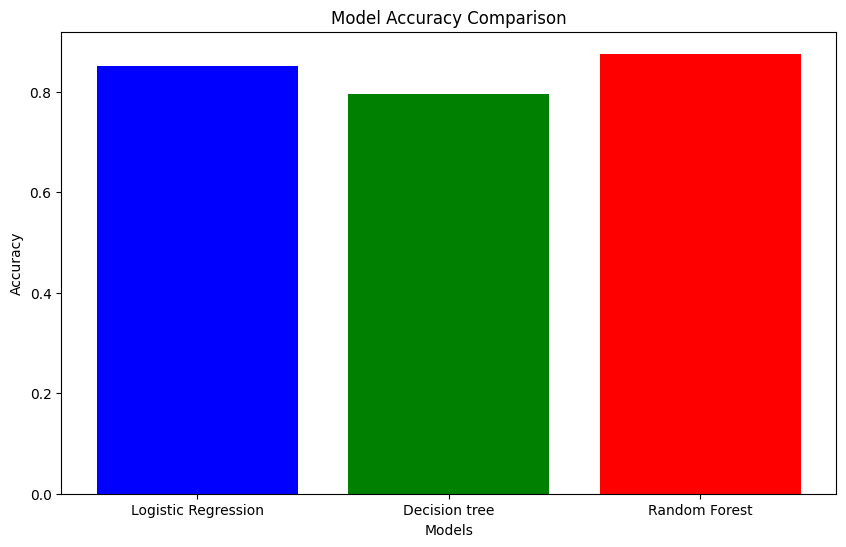

In [ ]:

models = ['Logistic Regression', 'Decision tree', 'Random Forest']
accuracy = [0.8505, 0.7945, 0.8755]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.show()


## All matrices plotting

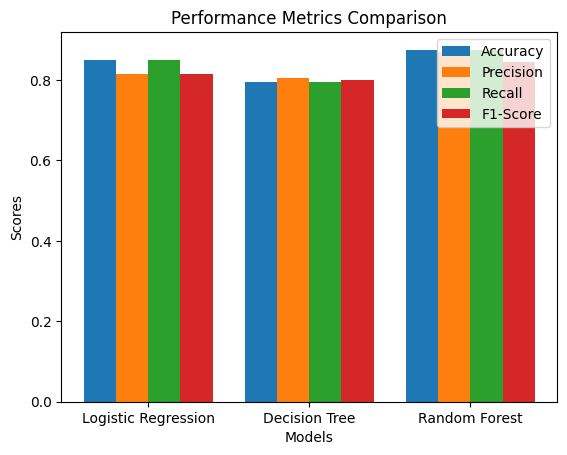

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Data
models = ['Logistic Regression','Decision Tree', 'Random Forest']
accuracy = [0.8505, 0.7945, 0.8755]
precision = [0.8157819065586277, 0.8046270585057308, 0.8699265230158678]
recall = [0.8505, 0.7945, 0.8755]
f1_score = [0.8142787576440295, 0.7992808872051814, 0.8461575173349792 ]


# Metrics bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, values[i], bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.show()


##Save the Model and Make Predictions on Real-World Input

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'rf_model.pkl')

# Save the vectorizer (assuming you're using SpaCy, you might need a different approach)
joblib.dump(selected_features, 'selected_features.pkl')


['selected_features.pkl']

In [ ]:
rf_model = joblib.load('rf_model.pkl')
selected_features = joblib.load('selected_features.pkl')


In [ ]:
# Reviews to predict
reviews = ["I find it a okayish product worth the money ", "the product was great as well as the price ", "The product is ok ok"]

# Convert each review into a vector
def word_vec(text):
    doc = nlp(text)  # Process text with spaCy
    return doc.vector

# Transform all input texts into vectors
reviews_transformed = np.array([word_vec(review) for review in reviews])

# **Select only the same 60 features** that were used for training
reviews_transformed = reviews_transformed[:, selected_features]

# Predict sentiments
predicted_classes = rf_model.predict(reviews_transformed)

# Sentiment mapping
sentiment_labels = {1: "Positive", 2: "Neutral", 3: "Negative"}

# Print results
for review, pred in zip(reviews, predicted_classes):
    print(f"Review: {review} -> Predicted Sentiment: {sentiment_labels.get(pred, 'Unknown')}")


Review: I find it a okayish product worth the money  -> Predicted Sentiment: Positive
Review: the product was great as well as the price  -> Predicted Sentiment: Positive
Review: The product is ok ok -> Predicted Sentiment: Positive


## Analysis

1️⃣ Model Performance Comparison
Random Forest (87.55%) performed the best due to its ability to handle complex patterns.
Logistic Regression (85.05%) also did well, leveraging linear decision boundaries.
Decision Tree (79.45%) had the lowest accuracy, likely due to overfitting.

2️⃣ Best Performing Feature Set
Word embeddings (spaCy vectors) + SelectKBest feature selection performed best.
This approach captured both semantic meaning and important word features, improving accuracy.

3️⃣ Challenges & Findings
Feature selection (60 features) was crucial for reducing noise and improving performance.
Imbalanced data might have influenced model bias.
Decision Tree overfitting showed the need for pruning or hyperparameter tuning.

4️⃣ Potential Improvements
Try deep learning (LSTMs, BERT) for better context understanding.
Hyperparameter tuning (Random Forest & Logistic Regression) to optimize performance.
Experiment with additional features like n-grams or contextual embeddings.

✅ Summary: Random Forest with word embeddings & feature selection was the best approach. Future work can focus on deep learning and fine-tuning models for further improvements.







